__TABLE OF CONTENT__

1-Briefing about the Project

2-Data and Package Imports

3-General Information about the Data

4-Data Wrangling

5-Exploratory Data Analysis (EDA)

      5a-Categorical Variables
  
      5b-Numerical Variables
  
 6-Analysing the Distribution of Numerical Variables
 
 7-Data Processing
 
       7a-Creating Dummy Variables
   
 8-Inferential Statistics
 
       8a-Hypothesis Testing
   
       9a-Hypothesis Testing Results

__Briefing about the Project__

Due to the pandemic, the problem of unemployment has risen uncontrollably thus leading many families to reconsider their expenses and therefore becoming hesitant to engage in long-term purchases. Car companies are one of the many institutions that rely on customers who engage in long-term purchases. The lack of funds that would regularly be accompanied by customers who are interested in buying new cars, have shifted towards car companies who are specialized in used cars as it costs fairly less and is a short-term investment. One set back that customers face when purchasing used cars, is if they are paying more than what they should be paying. It is fairly crucial to know the market price for the vehicles for the buyer, but also for the seller in order to compare prices to other sellers.

There is a need for a system in which the price of a certain used car can be determined by analyzing a variety of features. These features are very crucial in determining the best possible price for the used car in particular.

In this project, I will use a data set of 100.000 used vehicles information of 9 different brands. I will first import the packages those are relevant in this project.

__Data and Package Imports__

In [1]:
from scipy.stats import norm
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy.stats import t

# plots
import seaborn as sns
import matplotlib.pyplot as plt

First of all, we have to get access to our data, which I downloaded from kaggle to my computer.

In [2]:
os.getcwd()

'/Users/bahtinur/Desktop/Data_Science'

In [3]:
# This is the path of the data downloaded from kaggle:
path = '/Users/bahtinur/Desktop/Data_Science/Car-Project'
os.chdir(path)
dir_list = os.listdir(path)

__General Information about the Data__

I imported the data to python and now first of all, I will look at the data and see the columns with checking 5 rows.

In [4]:
# This is the file, I will use as first step:
ford = 'ford.csv'
df = pd.read_csv(ford)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


As next step, lets look at the data more deeply and see the Dtypes of the values, if there is any null.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In the data set, there are 17.965 samples, none of them are null and data set has 3 object datatypes those are categorical and 6 numerical datatypes.

As next step, lets work on descriptive analysis of our numerical data set. 

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


As we see, there are some errors in the data set and it should be corrected. 
Assuming that 2060 was coded as an error instead of 2016 (Also, it is the mean of the year of the data), 
so, we will replace 2060 with 2016. 

__Data Wrangling__

In [7]:
# To fix some errors
ford = df.replace(to_replace=2060, value=2016) 

After fixing the year, below table is the description of the data...Below table includes numerical variables (year, price, mileage, tax, mpg, and engineSize), however we also have categorical variables (transmission and fuelType) those we will convert them numerical to run regression analysis.

In [8]:
# After fixing the error in the data:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864125,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.024941,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


We have object dtypes variables, however, to make regression analysis we need to convert categorical variables 
to the numerical variables...
to include a categorical variable in a regression model, we will convert them to dummy variables...
Before converting them into dummy variables, lets look at to the relation between these variables and price.

__Exploratory Data Analysis of Categorical Variables__

In [9]:
ford['transmission'].value_counts()

Manual       15517
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

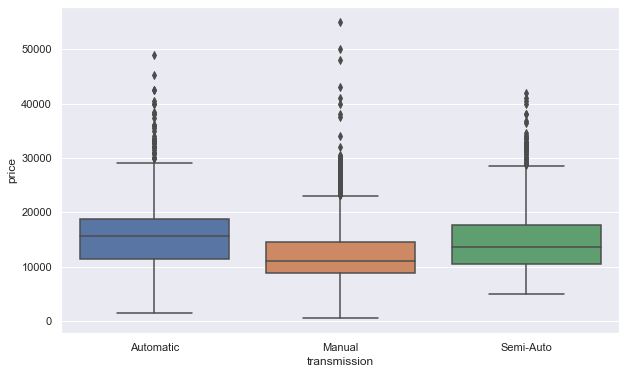

In [10]:
sns.set()
plt.figure(figsize=(10,6))
_ = sns.boxplot(x='transmission', y='price', data=ford)
plt.show()

The first observation here is that vehicles with manual transmission tend to be cheaper to purchase than other transmission types. This may be due to advanced resources required to design and implement automatic transmission systems. We can clearly see that this feature has a significant influence on the price. In the boxplot, we also see that there are some outliers in each type of vehicles.

Now, I am going to look at deeper to the fuelType of the vehicles and see the relationship between them and price.

In [11]:
ford['fuelType'].value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

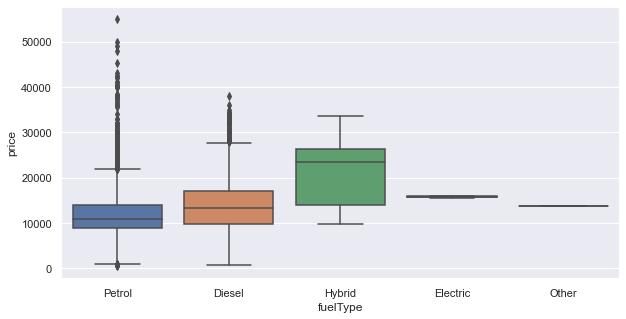

In [12]:
sns.set()
plt.figure(figsize=(10,5))
_ = sns.boxplot(x='fuelType', y='price', data=ford)
plt.show()

We can see that, on average, petrol vehicles are cheaper to purchase than vehicles with different fuel types. Hybrid vehicles are the most expensive to purchase on average, possibly due to the advanced technology required in order to merge petrol and electric motors. The value_counts of electric and other types are very less and Hybrid vehicles have no outlier values, interestingly. We can clearly observe that the fuel type is an important feature in determining a vehicles sale price.

In [13]:
ford['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Escort                      1
 Ranger                      1
 Transit Tourneo             1
Name: model, dtype: int64

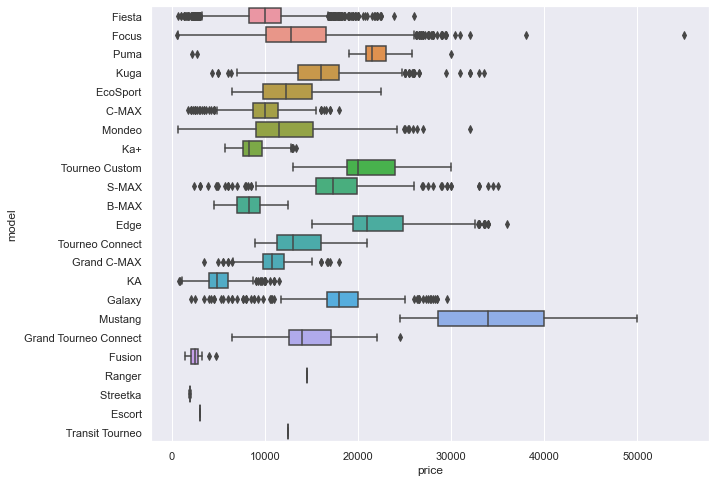

In [14]:
sns.set()
plt.figure(figsize=(10,8))
_ = sns.boxplot(x='price', y='model', data=ford)
plt.show()

When we look at to the model of the vehicles, Mustang, Edge, Torneo and Puma are the expensive vehicles. There are rare outliers between model and price relationship of the data.

__Data Wrangling of Numerical Variables__

Now, I will focus on to the numerical variables with starting to see general info.

In [15]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864125,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.024941,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [16]:
ford['engineSize'].value_counts()

1.0    7764
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
1.3      13
2.5      13
2.2      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

When I run the 'engineSize' column, we observed that there are 51 vehicles recorded with an engineSize of 0.0. This is obviously impossible and these vehicles must be investigated. Let us determine which percentage of our dataset contains this value.

In [17]:
len(ford[ford['engineSize'] == 0]) * 100 / len(ford)

0.28388533259114945

We see that these vehicles account for almost a quarter of a percent of the total dataset. As a result, I will remove these values.

In [18]:
engine_new = ford[ford['engineSize']==0.0].index
ford = ford.drop(engine_new)
ford['engineSize'].value_counts()

1.0    7764
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
5.0      45
1.8      35
1.3      13
2.5      13
2.2      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

Now, as a next step, I will look at the mileage where minimum value=1 that seems to be illogical. I will get deeper to it to understand, which year is equal 1 because, 2020 is OK but, before that year, it is not logical.

In [19]:
ford[ford['mileage']==1]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6930,Fiesta,2017,10995,Manual,1,Petrol,145,65.7,1.0
7133,Fiesta,2017,10995,Manual,1,Petrol,145,65.7,1.0
11129,EcoSport,2019,17900,Semi-Auto,1,Petrol,145,45.6,1.0
11173,Focus,2019,17880,Manual,1,Diesel,145,74.3,1.5
16906,Mondeo,2008,1299,Manual,1,Diesel,200,47.9,2.0
17193,Edge,2019,33495,Automatic,1,Diesel,145,37.2,2.0


As it is seen, there are 6 vehicles with mileage=1 before 2020. This value seem to be erroneous, so I will look at the magnitude of these values on overall data.

In [20]:
len(ford[(ford['mileage']==1) & (ford['year']<= 2019)]) * 100 / len(ford)

0.03349335715083175

This percentage is not so big, so I can remove value =1 from the vehicles before year 2020.

In [21]:
mileage_new = ford[(ford['mileage']==1) & (ford['year']<= 2019)].index
ford = ford.drop(mileage_new)
ford['mileage'].describe()

count     17908.000000
mean      23382.202814
std       19475.071516
min           2.000000
25%        9996.000000
50%       18254.500000
75%       31098.500000
max      177644.000000
Name: mileage, dtype: float64

In [22]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,2016.862966,12280.134298,23382.202814,113.333426,57.910476,1.354652
std,2.025108,4740.790728,19475.071516,62.019285,10.126393,0.426919
min,1996.000000,495.000000,2.000000,0.000000,20.800000,1.000000
25%,2016.000000,8999.000000,9996.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18254.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31098.500000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Let us now check that we have no missing entries with our dataset.



In [23]:
ford.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

We do not have any missing entries within our dataset. Our data has been successfully cleaned.



__Analysing Relationships Between Numerical Variables__


In this section we shall analyse the relationships between the numerical variables in our dataset. We shall start by creating a correlation heatmap of the numerical variables.

<AxesSubplot:>

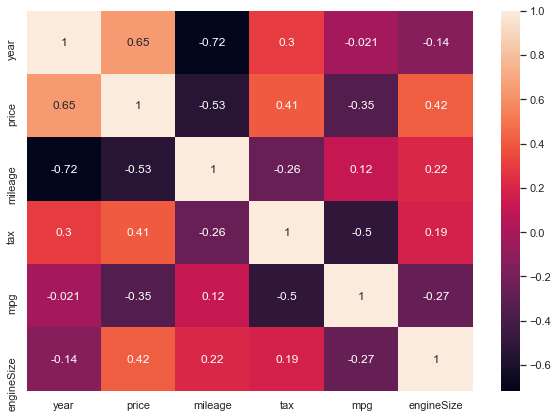

In [24]:
plt.figure(figsize = (10,7))
sns.heatmap(ford.corr(), annot = True)

In [25]:
abs (ford.corr()["price"]).sort_values(ascending =False)

price         1.000000
year          0.645713
mileage       0.531222
engineSize    0.416651
tax           0.407372
mpg           0.346484
Name: price, dtype: float64

We noticed that there is a positive correlation between year and price and a negative correlation between mileage and price. This makes sense, since newer cars are generally more expensive and cars with more mileage are relatively cheaper. We also notice a negative correlation between mileage and year - the newer a car is the less miles it is likely to have travelled. Furthermore, we notice a positive correlation between engine size and price, and negative correlation between engine size and mpg. This follows expectation, since it is common practice for manufacturers to sell models with larger engines for a higher price in comparison to the same model with a smaller engine. Also, as the engine size increase, the miles per gallon decreases which is logical. As a result, due to the higher price, a larger tax payment is required, hence the positive correlation. This also explains the positive correlation between tax and price.

Lets go deeper and make deeper observations with scatter plots. I will run the pairplot...

<Figure size 288x288 with 0 Axes>

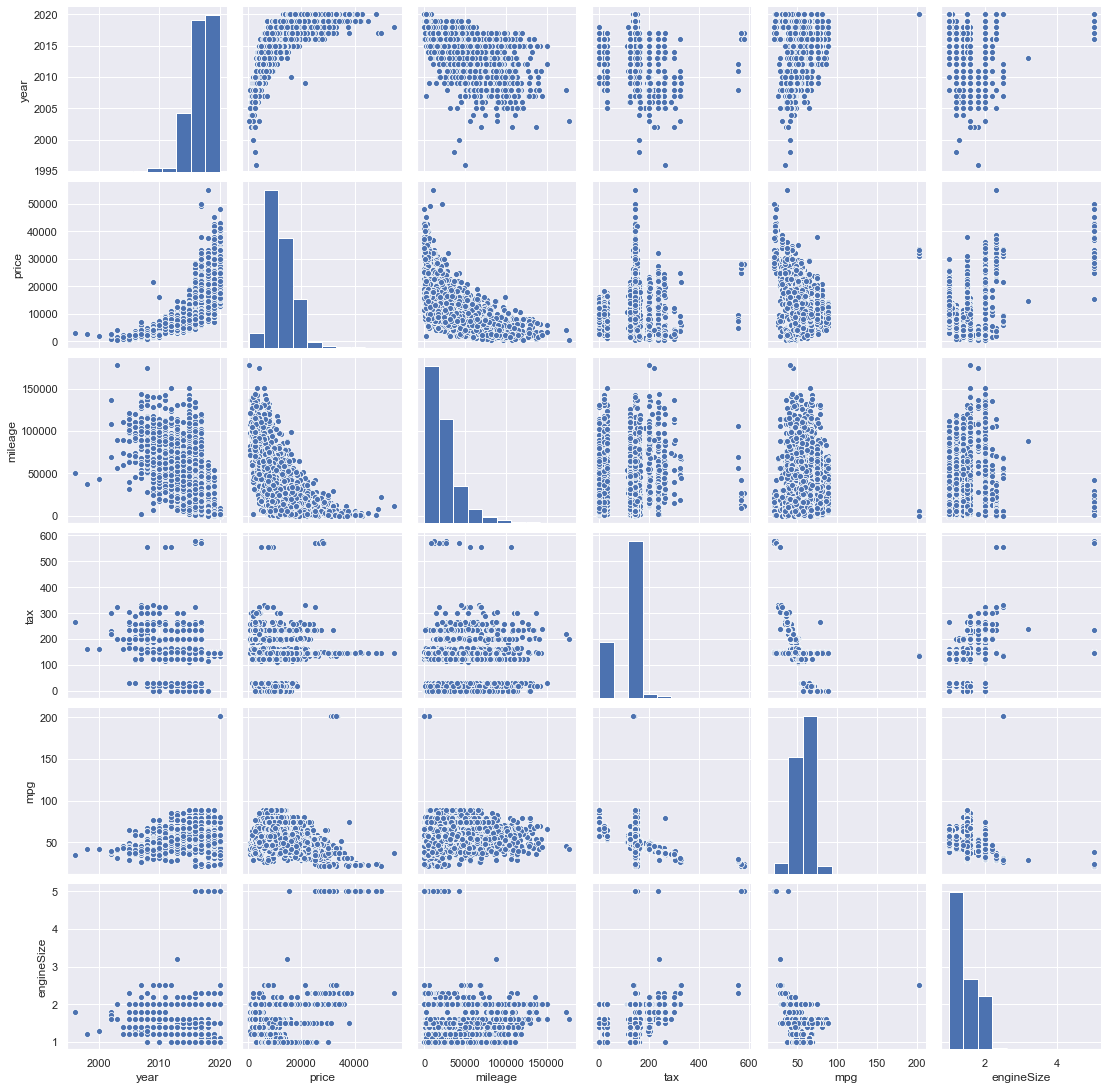

In [26]:
plt.figure(figsize = (4,4))
sns.pairplot(ford)

Text(0.5, 1.0, 'Scatter plot of Mileage against Price')

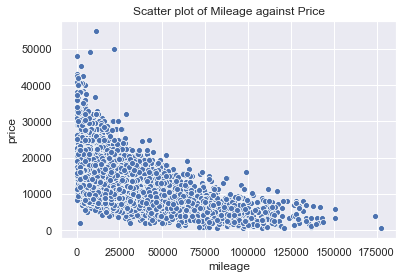

In [27]:
sns.scatterplot(x='mileage',y='price',data=ford)
plt.title('Scatter plot of Mileage against Price')

We notice that the earlier mileage on a vehicle has the most negative impact on the price. This can be seen since the slope on the plot is much steeper for lower mileage, while the rate of decrease of the price reduces as the mileage increases.

Text(0.5, 1.0, 'Scatter plot of EngineSize against Price')

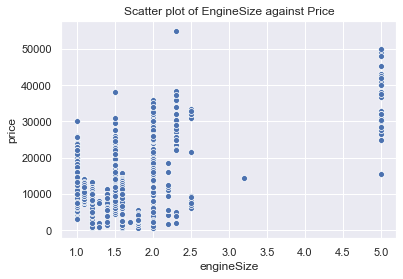

In [28]:
sns.scatterplot(x='engineSize',y='price',data=ford)
plt.title('Scatter plot of EngineSize against Price')

We clearly see that as the engine size of the vehicle increases, the price tends to increase too.

Text(0.5, 1.0, 'Scatter plot of Year against Price')

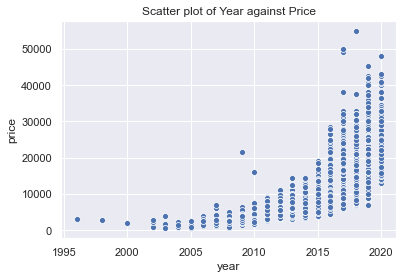

In [29]:
sns.scatterplot(x='year',y='price',data=ford)
plt.title('Scatter plot of Year against Price')

As expected, the new vehicles are much expensive than the older ones.

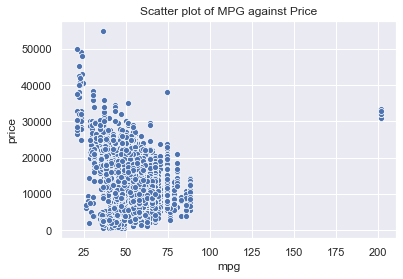

In [30]:
sns.scatterplot(x='mpg',y='price',data=ford)
plt.title('Scatter plot of MPG against Price')
plt.show()


__Analysing the Distribution of Numerical Variables__


In order to achieve optimised prediction results, we must first ensure that our numerical features are normally distributed. To do this, we produced histograms and check that the follow the "bell" shaped curve.

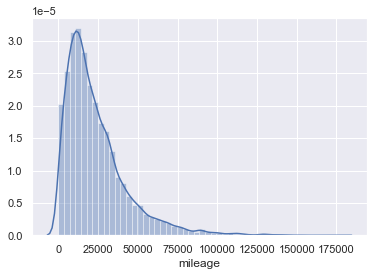

In [31]:
sns.distplot((ford['mileage']))
plt.show()

Mileage data is positively skewed.

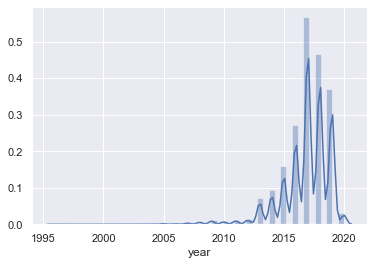

In [32]:
sns.distplot((ford['year']))
plt.show()

Year is negatively skewed.

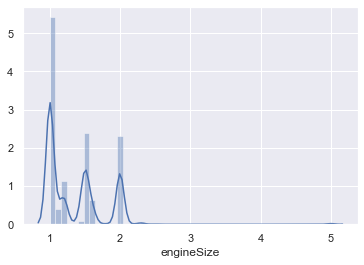

In [33]:
sns.distplot((ford['engineSize']))
plt.show()

EngineSize is also positively skewed.

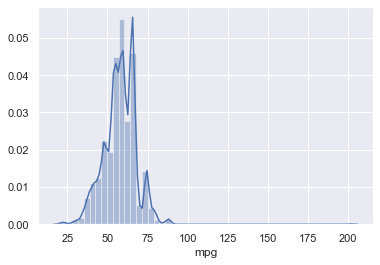

In [34]:
sns.distplot((ford['mpg']))
plt.show()

We can see a positive skew in mpg.

__Data Processing__

__Creating Dummy Variables__

In order to use our categorical variables in the regression analysis, we must create dummy variables for them. I converted categorical variables into numerical and as next step, I will concatenate these numerical variables with the original data. Also, I removed the original categorical variables from my data set.

In [35]:
ford_object = ['transmission', 'fuelType']
ford_dummies = pd.get_dummies(ford[ford_object])
ford_dummies.head(10)

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,1
6,0,1,0,0,0,0,0,1
7,0,1,0,0,0,0,0,1
8,1,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,1


In [36]:
# We concatenate the dummy variables with the original data:
ford_concat = pd.concat([ford, ford_dummies], axis = 1)
ford_concat.drop(ford_object, axis=1, inplace=True)
ford_concat.head(10)

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,0,0,1
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,0,0,1
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,0,0,1
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,0,0,1
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,0,0,1
5,Fiesta,2015,10500,35432,145,47.9,1.6,0,1,0,0,0,0,0,1
6,Puma,2019,22500,2029,145,50.4,1.0,0,1,0,0,0,0,0,1
7,Fiesta,2017,9000,13054,145,54.3,1.2,0,1,0,0,0,0,0,1
8,Kuga,2019,25500,6894,145,42.2,2.0,1,0,0,1,0,0,0,0
9,Focus,2018,10000,48141,145,61.4,1.0,0,1,0,0,0,0,0,1


In [37]:
# This is the info about the concatenated data:
ford_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17908 entries, 0 to 17964
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   17908 non-null  object 
 1   year                    17908 non-null  int64  
 2   price                   17908 non-null  int64  
 3   mileage                 17908 non-null  int64  
 4   tax                     17908 non-null  int64  
 5   mpg                     17908 non-null  float64
 6   engineSize              17908 non-null  float64
 7   transmission_Automatic  17908 non-null  uint8  
 8   transmission_Manual     17908 non-null  uint8  
 9   transmission_Semi-Auto  17908 non-null  uint8  
 10  fuelType_Diesel         17908 non-null  uint8  
 11  fuelType_Electric       17908 non-null  uint8  
 12  fuelType_Hybrid         17908 non-null  uint8  
 13  fuelType_Other          17908 non-null  uint8  
 14  fuelType_Petrol         17908 non-null

Now, I have 15 variables, model is categorical and the other columns are numerical. In the data set, fuelType column has fuelType_electric and FuelType_other those have 2 and 1 value_counts for the whole dataset. I will remove those columns.



In [38]:
not_necessary = ['fuelType_Other', 'fuelType_Electric']
temp = ford_concat.copy()
temp.drop(not_necessary, axis=1, inplace=True)
ford = temp
ford.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,1
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,1
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,1
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,1
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,1


In [39]:
# The type of the columns
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17908 entries, 0 to 17964
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   17908 non-null  object 
 1   year                    17908 non-null  int64  
 2   price                   17908 non-null  int64  
 3   mileage                 17908 non-null  int64  
 4   tax                     17908 non-null  int64  
 5   mpg                     17908 non-null  float64
 6   engineSize              17908 non-null  float64
 7   transmission_Automatic  17908 non-null  uint8  
 8   transmission_Manual     17908 non-null  uint8  
 9   transmission_Semi-Auto  17908 non-null  uint8  
 10  fuelType_Diesel         17908 non-null  uint8  
 11  fuelType_Hybrid         17908 non-null  uint8  
 12  fuelType_Petrol         17908 non-null  uint8  
dtypes: float64(2), int64(4), object(1), uint8(6)
memory usage: 1.2+ MB


I am also going to rename new dummy variables.

In [40]:
# Renaming the new dummy variables
ford.rename(columns={'transmission_Automatic':'Automatic','transmission_Manual':'Manual', 'transmission_Semi-Auto':'Semi_Auto','fuelType_Diesel':'Diesel', 'fuelType_Petrol':'Petrol', 'fuelType_Hybrid':'Hybrid' }, inplace=True)
ford.head()

,model,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,1
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,1
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,1
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,1
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,1


__INFERENTIAL STATISTICS__

In the inferential statistics part of the project, I will use Automatic type of the vehicle and test if there is any difference on predicting the price of automatic and non-automatic vehicles.

__Hypothesis Testing__

Null = There is no difference between the mean of prices of automatic and non-automatic vehicles.

Alternative = There is difference between them.

I will perform a _t_-test on two independent samples. I will calculate the value of the test statistic and then its probability (the p-value).

If the p-value is equal or lower than the significance level 0.05, the null hypothesis is going to be rejected.

In [41]:
auto = ford[ford['Automatic']==1]
non_auto = ford[ford['Automatic']==0]

In [42]:
auto = auto.price
no_auto = non_auto.price

In [43]:
std_no = np.std(no_auto, ddof=1)
std_auto = np.std(auto, ddof=1)
mean_no = np.mean(no_auto)
mean_auto = np.mean(auto)
size_no = len(no_auto)
size_auto = len(auto)

In [44]:
pooled_std_dev = np.sqrt(((size_no-1)*(std_no**2)+(size_auto-1)*(std_auto**2)) / (size_no + size_auto - 2))
print(pooled_std_dev)

4637.313432003047


In [45]:
t_test_statistic = (mean_no - mean_auto) / (pooled_std_dev * np.sqrt((1/size_no)+(1/size_auto)))
p = t.sf(np.abs(t_test_statistic),size_auto-1 + size_no-1)*2
print("t = ", t_test_statistic, " p = ", p)

t =  -28.44419082335351  p =  4.195386605157033e-174


In [46]:
from scipy.stats import ttest_ind
ttest_ind(auto, no_auto)

Ttest_indResult(statistic=28.44419082335348, pvalue=4.195386605160137e-174)

__Hypothesis Testing Result__

The pvalue in both calculations are lower than 0.05. It appears that there is a difference between how much is the price of automatic vehicles versus how much non-automatic vehicles prices.

As a result, our hypothesis testing result is we are going to reject null hypothesis and accept the alternative one.



__Preprocessing and Training Data Development__ 

  ___a.Creating Training and Test Sets___


In [47]:
ford.head()

,model,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Semi_Auto,Diesel,Hybrid,Petrol
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,1
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,1
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,1
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,1
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,1


In the data set, I have still an object data type called, 'model'. I will also convert categorical variable to numerical which i did in the previous cells.

In [48]:
model=pd.get_dummies(ford['model'])
model.head(10)

,B-MAX,C-MAX,EcoSport,Edge,Escort,Fiesta,Focus,Fusion,Galaxy,Grand C-MAX,...,Kuga,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
ford_concat = pd.concat([ford, model], axis = 1)
ford_concat.head(10)

,model,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Semi_Auto,...,Kuga,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Fiesta,2015,10500,35432,145,47.9,1.6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Puma,2019,22500,2029,145,50.4,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,Fiesta,2017,9000,13054,145,54.3,1.2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Kuga,2019,25500,6894,145,42.2,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,Focus,2018,10000,48141,145,61.4,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
ford_svk=ford_concat.drop('model', axis=1)
ford_svk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17908 entries, 0 to 17964
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    17908 non-null  int64  
 1   price                   17908 non-null  int64  
 2   mileage                 17908 non-null  int64  
 3   tax                     17908 non-null  int64  
 4   mpg                     17908 non-null  float64
 5   engineSize              17908 non-null  float64
 6   Automatic               17908 non-null  uint8  
 7   Manual                  17908 non-null  uint8  
 8   Semi_Auto               17908 non-null  uint8  
 9   Diesel                  17908 non-null  uint8  
 10  Hybrid                  17908 non-null  uint8  
 11  Petrol                  17908 non-null  uint8  
 12   B-MAX                  17908 non-null  uint8  
 13   C-MAX                  17908 non-null  uint8  
 14   EcoSport               17908 non-null

__Scaling The Data__

The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

The data must be prepared before building the models. The data preparation process can involve three steps: data selection, data preprocessing and data transformation.

Many machine learning algorithms don't perform as well if the features are not on relatively similar scales.

I will use StandardScaler to normalize the features of the data. StandardScaler scales each column to have 0 mean and unit variance.


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
col_names = list(ford_svk.columns)
s_scaler = preprocessing.StandardScaler()
ford_scaled = s_scaler.fit_transform(ford_svk)
ford_scaled = pd.DataFrame(ford_scaled, columns=col_names)

In [53]:
ford_svk.describe()

,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Semi_Auto,Diesel,...,Kuga,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo
count,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,...,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,2016.862966,12280.134298,23382.202814,113.333426,57.910476,1.354652,0.075720,0.863636,0.060643,0.321309,...,0.124190,0.029261,0.003183,0.004411,0.000056,0.016529,0.000112,0.001843,0.003853,0.000056
std,2.025108,4740.790728,19475.071516,62.019285,10.126393,0.426919,0.264558,0.343184,0.238682,0.466992,...,0.329808,0.168541,0.056329,0.066274,0.007473,0.127501,0.010568,0.042889,0.061955,0.007473
min,1996.000000,495.000000,2.000000,0.000000,20.800000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8999.000000,9996.000000,30.000000,52.300000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,11291.000000,18254.500000,145.000000,58.900000,1.200000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,15299.000000,31098.500000,145.000000,65.700000,1.500000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
ford_scaled.describe()

,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Semi_Auto,Diesel,...,Kuga,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo
count,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,...,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04,1.790800e+04
mean,-5.216276e-14,3.221370e-16,2.157954e-16,5.815032e-16,-9.302888e-16,1.108084e-16,-3.062576e-14,1.768587e-14,2.852959e-15,2.100472e-15,...,-2.604170e-15,-1.408960e-14,1.147932e-17,7.915578e-16,-1.953118e-15,4.581716e-16,2.074939e-15,7.153749e-16,4.658470e-15,-3.131138e-15
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.030244e+01,-2.485970e+00,-1.200553e+00,-1.827441e+00,-3.664830e+00,-8.307470e-01,-2.862231e-01,-2.516611e+00,-2.540833e-01,-6.880584e-01,...,-3.765642e-01,-1.736164e-01,-5.650751e-02,-6.656563e-02,-7.472890e-03,-1.296407e-01,-1.056856e-02,-4.296689e-02,-6.219268e-02,-7.472890e-03
25%,-4.261454e-01,-6.921263e-01,-6.873698e-01,-1.343707e+00,-5.540603e-01,-8.307470e-01,-2.862231e-01,3.973597e-01,-2.540833e-01,-6.880584e-01,...,-3.765642e-01,-1.736164e-01,-5.650751e-02,-6.656563e-02,-7.472890e-03,-1.296407e-01,-1.056856e-02,-4.296689e-02,-6.219268e-02,-7.472890e-03
50%,6.766926e-02,-2.086491e-01,-2.633031e-01,5.106066e-01,9.772007e-02,-3.622607e-01,-2.862231e-01,3.973597e-01,-2.540833e-01,-6.880584e-01,...,-3.765642e-01,-1.736164e-01,-5.650751e-02,-6.656563e-02,-7.472890e-03,-1.296407e-01,-1.056856e-02,-4.296689e-02,-6.219268e-02,-7.472890e-03
75%,5.614839e-01,6.368030e-01,3.962251e-01,5.106066e-01,7.692513e-01,3.404688e-01,-2.862231e-01,3.973597e-01,-2.540833e-01,1.453365e+00,...,-3.765642e-01,-1.736164e-01,-5.650751e-02,-6.656563e-02,-7.472890e-03,-1.296407e-01,-1.056856e-02,-4.296689e-02,-6.219268e-02,-7.472890e-03
max,1.549113e+00,9.010324e+00,7.921209e+00,7.524750e+00,1.420975e+01,8.538980e+00,3.493779e+00,3.973597e-01,3.935717e+00,1.453365e+00,...,2.655590e+00,5.759824e+00,1.769676e+01,1.502277e+01,1.338170e+02,7.713624e+00,9.462029e+01,2.327373e+01,1.607906e+01,1.338170e+02


As we see above, the scaled values of the columns changed when we standardize the values of each column.

Next, I will split my data into training and test group to understand the model performance those I will use in the model section of my project. 

I will split dataset by using function train_test_split(). I will pass 3 parameters; X features without target variable, y as target variable, and test_size. Additionally, I will use random_state to select records randomly.

My target variable is going to be price column and assign it as y. Other variables are going to be X.




In [99]:
X = ford_svk.drop('price',axis=1).values
y = ford_svk['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state=123)

In [100]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [101]:
y_pred[0:20].mean()

11255.845820730481

In [102]:
svr.score(X_test, y_test)

0.09727197711093238

In [103]:
from sklearn.linear_model import LinearRegression
import numpy as np
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [104]:
linreg.score(X_test, y_test)

0.8526488601903361

In [105]:
y_pred[0:20].mean()

12179.69545650324

In [106]:
X = ford_scaled.drop('price',axis=1).values
y = ford_scaled['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250,random_state=123)

In [107]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [109]:
svr.score(X_test, y_test)

0.9255493835863575

In [110]:
y_pred[0:5].mean()

-0.09013678279393807

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ford_svk)
unscaled = scaler.inverse_transform(scaled)

In [112]:
y_pred[0:5].mean()

-0.09013678279393807

In [66]:
print("R^2: {}".format(svr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9255493835863575
Root Mean Squared Error: 0.2697773262281415


In [67]:
svr_scores = cross_val_score(svr, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(svr_scores)))

Average 5-Fold CV Score: 0.904045468855505


In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [69]:
dtr.score(X_test, y_test)

0.8946109934437038

In [70]:
print("R^2: {}".format(dtr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8946109934437038
Root Mean Squared Error: 0.3209733333489887


In [71]:
dtr_scores = cross_val_score(dtr, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(dtr_scores)))

Average 5-Fold CV Score: 0.8792847814842577


In [72]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [73]:
mlp.score(X_test, y_test)

0.929814720072823

In [74]:
print("R^2: {}".format(mlp.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.929814720072823
Root Mean Squared Error: 0.26193547175790927


In [75]:
cv_scores = cross_val_score(mlp, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.11942188132678204


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import Ridge

In [77]:
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

In [78]:
ridge.score(X_test, y_test)

0.8099153701980542

In [79]:
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8099153701980542
Root Mean Squared Error: 0.26193547175790927


In [80]:
ridge_cv = cross_val_score(ridge, X, y,cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))

Average 5-Fold CV Score: 0.44776773404023845


In [81]:
from sklearn.linear_model import LinearRegression
import numpy as np
linreg = LinearRegression()

In [82]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred = linreg.predict(X_test)

In [84]:
linreg.score(X_test, y_test)

0.8526532224503646

In [85]:
print("R^2: {}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8526532224503646
Root Mean Squared Error: 0.3795260743231203


In [86]:
cv_scores = cross_val_score(linreg, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: -4.298410992370576e+19


In [114]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rfr.score(X_test, y_test)


0.9300265002697191

In [115]:
print("Random Forest R2 Score: {}".format(rfr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Random Forest R2 Score: 0.9300265002697191
Root Mean Squared Error: 0.26153998529992617


In [116]:
cv_scores = cross_val_score(rfr, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.9217491812428985


In [117]:
y_pred[0:5].mean()

-0.040471030870539736